### IMPORTS

In [4]:
from Inference import BBVI 
import torch
import matplotlib.pyplot as plt

### EXAMPLE

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [6]:
# load data
data = torch.load('Data/foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [7]:
Net = BBVI.VariationalNetwork(input_size=1, output_size=1, layer_width=30, nb_layers=2, device=device)

In [8]:
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.5}

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 3, 'factor': 0.8}

In [9]:
voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params)

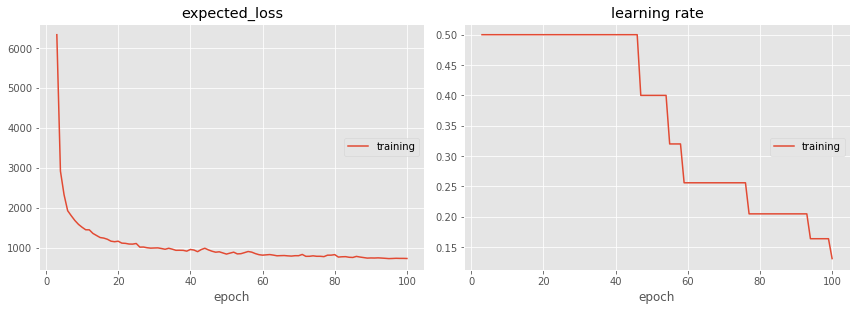

expected_loss:
training   (min:  723.668, max: 573152.812, cur:  726.543)

learning rate:
training   (min:    0.131, max:    0.500, cur:    0.131)


In [10]:
Net = voptimizer.run((x_data,y_data), n_epoch=100, n_iter=20, n_ELBO_samples=20, plot=True)

In [11]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)

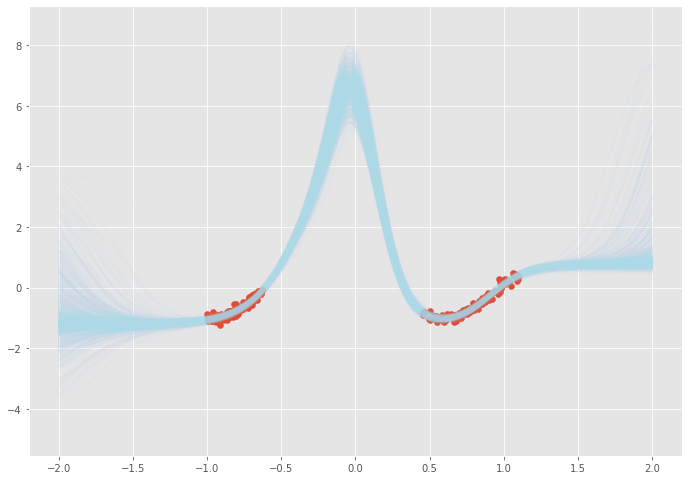

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    Net.sample_parameters()

    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue')

In [14]:
data_validation = torch.load('Data/foong_data_validation.pt')
x_data_validation = data_validation[0].to(device)
y_data_validation = data_validation[1].to(device)
y_data_validation = y_data_validation.unsqueeze(-1)

In [15]:
Net.sample_parameters(M=997)

([tensor([[[-0.5268],
           [ 3.7365],
           [ 3.3630],
           ...,
           [-0.2148],
           [ 6.2462],
           [ 3.0649]],
  
          [[-1.2523],
           [ 3.9359],
           [ 3.4281],
           ...,
           [ 0.1346],
           [ 6.4069],
           [ 3.4037]],
  
          [[ 0.7085],
           [ 3.9194],
           [ 3.1471],
           ...,
           [-0.4941],
           [ 6.4181],
           [ 3.1661]],
  
          ...,
  
          [[ 0.2560],
           [ 3.9669],
           [ 3.1020],
           ...,
           [-0.2399],
           [ 5.7491],
           [ 3.2580]],
  
          [[ 0.7632],
           [ 3.7956],
           [ 3.4284],
           ...,
           [-0.2033],
           [ 5.9435],
           [ 3.2657]],
  
          [[-0.8430],
           [ 3.9298],
           [ 3.3566],
           ...,
           [-0.0965],
           [ 6.5914],
           [ 3.2203]]], device='cuda:0', grad_fn=<AddBackward0>),
  tensor([[[ 3.9773e-04,  2.53

In [16]:
y_pred_validation = Net.forward(x_data_validation)

In [17]:
y_pred_validation.shape

torch.Size([997, 2000, 1])

In [18]:
LL = Net._log_norm(y_pred_validation, y_data_validation, torch.tensor(0.1).to(device))

In [19]:
LL.sum(dim=[1,2]).shape

torch.Size([997])

In [20]:
LL.sum(dim=[1,2]).mean()

tensor(1384.4718, device='cuda:0', grad_fn=<MeanBackward0>)

In [81]:
Net.compute_elbo(x_data, y_data, n_samples_ELBO=100000, sigma_noise=0.1, device=device)

tensor(627.2961, grad_fn=<DivBackward0>)